# 1. Introduction

#### APIs

By definition, an application programming interface, or API, is a set of functions and procedures that allow applications access to features or data of a service.  The basic idea of an API is it provides a portal for a user to access data from a server or database in a controlled manner. 
APIs have a wide range of functions, from serving as interfaces between an application and an operating system, to communication between websites and companies, to even storage of data.
There’s probably a fancier way to describe it and you are encouraged to learn more about it if this interests you.

In this project we will be interacting with an API to retrieve data and perform calculations on that data once is asynchronously returned to us. 

#### Requests package

Requests is a python library designed to interface with APIs.  Take a look at this video and learn about how you can use this package. 

Read about the requests package on their documentation site here.  Directions on installing the requests package can be found here. Be sure to use a virtual environment (instructions can be found in Project #2).

#### Poké API

https://pokeapi.co/
Now that you’ve gotten the requests library installed, lets explore an API.  We’ll start with a beautifully simple Poké API.  Take some time to look at it and read their documentation. A big part of a developer’s job is learning to read/write documentation. Remember: you’re not coding for yourself, you’re teaching people how to maintain and read your code. Nobody wants to be handed down messy code. 


In [1]:
import requests as req

## Task 1:
#### Start a new notebook and successfully contact the Pokemon API and perform the following individual API calls
* Get the original 151 Pokemon and list their names. 

In [2]:
poke = req.get('https://pokeapi.co/api/v2/')
poke.status_code

200

In [3]:
poke.json()['pokemon']

'https://pokeapi.co/api/v2/pokemon/'

In [4]:
poke2 = req.get('https://pokeapi.co/api/v2/pokemon?limit=151')

In [5]:
poke2

<Response [200]>

In [6]:
#pokemon names for og 151
[i['name'] for i in poke2.json()['results']]

['bulbasaur',
 'ivysaur',
 'venusaur',
 'charmander',
 'charmeleon',
 'charizard',
 'squirtle',
 'wartortle',
 'blastoise',
 'caterpie',
 'metapod',
 'butterfree',
 'weedle',
 'kakuna',
 'beedrill',
 'pidgey',
 'pidgeotto',
 'pidgeot',
 'rattata',
 'raticate',
 'spearow',
 'fearow',
 'ekans',
 'arbok',
 'pikachu',
 'raichu',
 'sandshrew',
 'sandslash',
 'nidoran-f',
 'nidorina',
 'nidoqueen',
 'nidoran-m',
 'nidorino',
 'nidoking',
 'clefairy',
 'clefable',
 'vulpix',
 'ninetales',
 'jigglypuff',
 'wigglytuff',
 'zubat',
 'golbat',
 'oddish',
 'gloom',
 'vileplume',
 'paras',
 'parasect',
 'venonat',
 'venomoth',
 'diglett',
 'dugtrio',
 'meowth',
 'persian',
 'psyduck',
 'golduck',
 'mankey',
 'primeape',
 'growlithe',
 'arcanine',
 'poliwag',
 'poliwhirl',
 'poliwrath',
 'abra',
 'kadabra',
 'alakazam',
 'machop',
 'machoke',
 'machamp',
 'bellsprout',
 'weepinbell',
 'victreebel',
 'tentacool',
 'tentacruel',
 'geodude',
 'graveler',
 'golem',
 'ponyta',
 'rapidash',
 'slowpoke',
 '

* Get a count for all Pokemon available on the API, and sort them in a dictionary organized by the letter they start with. Eg. { A: [‘all pokemon with names starting with A’] }


In [7]:
poke3 = req.get('https://pokeapi.co/api/v2/pokemon?limit=964')

In [8]:
poke3

<Response [200]>

In [9]:
alpha_dict = dict()
for i in sorted([pokemon['name'] for pokemon in poke3.json()['results']]):
    try:
        v = alpha_dict[i[0]]
        v.append(i)
        alpha_dict.update({i[0]:v})
    except:
        alpha_dict.update({i[0]:[i]})

In [10]:
alpha_dict['a']

['abomasnow',
 'abomasnow-mega',
 'abra',
 'absol',
 'absol-mega',
 'accelgor',
 'aegislash-blade',
 'aegislash-shield',
 'aerodactyl',
 'aerodactyl-mega',
 'aggron',
 'aggron-mega',
 'aipom',
 'alakazam',
 'alakazam-mega',
 'alomomola',
 'altaria',
 'altaria-mega',
 'amaura',
 'ambipom',
 'amoonguss',
 'ampharos',
 'ampharos-mega',
 'anorith',
 'araquanid',
 'araquanid-totem',
 'arbok',
 'arcanine',
 'arceus',
 'archen',
 'archeops',
 'ariados',
 'armaldo',
 'aromatisse',
 'aron',
 'articuno',
 'audino',
 'audino-mega',
 'aurorus',
 'avalugg',
 'axew',
 'azelf',
 'azumarill',
 'azurill']

* Find a way to get your top 3 pokemon and display their image on your notebook. Bonus: Make it into a function that can display any Pokemon given its name.


In [11]:
pokeform = req.get('https://pokeapi.co/api/v2/pokemon-form?limit=964')

In [12]:
# pokeform.json()

In [13]:
from IPython.display import Image, display
def pokepic(name:str):
    '''
    Given a pokemon name, return its picture. You'd need to query the pokemon forms first.
    '''
    try:
        the_goods = [i for i in pokeform.json()['results'] if i['name']== name]
        image1 = req.get(the_goods[0]['url']) # get the forms
        image2 = image1.json()['sprites']['front_default']
        image3 = req.get(image2, stream = all)
        return(display(Image(image3.content)))
        
    except:
        print('name: {name} does not exist, please check the spelling')

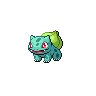

In [14]:
pokepic('bulbasaur')

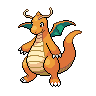

In [15]:
pokepic('dragonite')

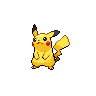

In [16]:
pokepic('pikachu')

* Get all “dragon” type pokemon and list them.

In [17]:
drag = req.get('https://pokeapi.co/api/v2/type/dragon')

In [18]:
[i['pokemon']['name'] for i in drag.json()['pokemon']]

['dratini',
 'dragonair',
 'dragonite',
 'kingdra',
 'vibrava',
 'flygon',
 'altaria',
 'bagon',
 'shelgon',
 'salamence',
 'latias',
 'latios',
 'rayquaza',
 'gible',
 'gabite',
 'garchomp',
 'dialga',
 'palkia',
 'giratina-altered',
 'axew',
 'fraxure',
 'haxorus',
 'druddigon',
 'deino',
 'zweilous',
 'hydreigon',
 'reshiram',
 'zekrom',
 'kyurem',
 'dragalge',
 'tyrunt',
 'tyrantrum',
 'goomy',
 'sliggoo',
 'goodra',
 'noibat',
 'noivern',
 'zygarde',
 'turtonator',
 'drampa',
 'jangmo-o',
 'hakamo-o',
 'kommo-o',
 'guzzlord',
 'naganadel',
 'giratina-origin',
 'kyurem-black',
 'kyurem-white',
 'charizard-mega-x',
 'ampharos-mega',
 'garchomp-mega',
 'latias-mega',
 'latios-mega',
 'sceptile-mega',
 'altaria-mega',
 'rayquaza-mega',
 'salamence-mega',
 'exeggutor-alola',
 'zygarde-10',
 'zygarde-50',
 'zygarde-complete',
 'kommo-o-totem',
 'necrozma-ultra']


#### Bonus: handle bad responses, learn about status codes and only perform your logic if you get a “good” response code. If you get a “bad” response alert the user. 

* 200 OK, 201 Created, 202 Accepted: Everything went awesome.

* 400 Bad Request:Your request is invalid and/or not formed properly. You need to reformulate your request.

* 401 Not Authorized: Either you need to provide authentication credentials, or the credentials provided aren't valid.

* 403 Forbidden: We understand your request, but are refusing to fulfill it. An accompanying error message should explain why.

* 404 Not Found: Either you're requesting an invalid URI or the resource in question doesn't exist (ex: no such user).

* 500 Internal Server Error: We did something wrong. We'll be notified and we'll look into it.

* 502 Bad Gateway: Returned if Intervals is down or being upgraded, or if the system is overloaded and API requests are being throttled.

* 503 Service Unavailable: Usually as a result of suspension, we are refusing to process this request. You *may* try again later.

In [19]:
# do a basic try/except or do a raise ValueError based on the value returned.

## Task 2
#### Great this should give you a little background on how APIs work. Now let’s use an API that’s a bit more complex and more biology related.  Use the requests package to do the following tasks in your jupyter notebooks.

* Write a query that requests a json file for the first 10 human proteins (Homo sapiens) that have an amino acid length between 3-14 in https://www.ebi.ac.uk/proteins/api/doc/index.html.  Grab the protein name, and the protein sequence.


In [20]:
hPro = req.get('https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=10&organism=homo%20sapiens&seqLength=3-14',
              headers = {"Accept" : "application/json"})

##### to get names and sequence of 1 entry...

In [21]:
hPro.json()[0]['protein']

{'submittedName': [{'fullName': {'value': 'Integrin a4 subunit',
    'evidences': [{'code': 'ECO:0000313',
      'source': {'name': 'EMBL',
       'id': 'AGZ05213.1',
       'url': 'https://www.ebi.ac.uk/ena/data/view/AGZ05213.1'}}]}}]}

In [22]:
hPro.json()[0]['protein']['submittedName'][0]['fullName']['value']

'Integrin a4 subunit'

In [23]:
hPro.json()[0]['sequence']

{'version': 1,
 'length': 11,
 'mass': 1317,
 'modified': '2014-07-09',
 'sequence': 'DYVKKFGENFA'}

In [24]:
hPro.json()[0]['sequence']['sequence']

'DYVKKFGENFA'

##### to get it out as a function

In [25]:
def get_first_n (n:int, r1:int, r2:int):
    '''gets the first "n" number of human proteins names and sequences with lengths from r1 to r2 '''
    hPro = req.get(f'https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size={n}&organism=homo%20sapiens&seqLength={r1}-{r2}',
              headers = {"Accept" : "application/json"})
    
    empty = list()
    for i,v in enumerate(hPro.json()):
        name = hPro.json()[i]['protein']['submittedName'][0]['fullName']['value']
        sequ = hPro.json()[i]['sequence']['sequence']
        empty.append((name,sequ))
    
    return(empty)

In [26]:
[print(f'protein name: {i}\nsequence: {v}') for i,v in get_first_n(n=10,r1=3,r2=14)]

protein name: Integrin a4 subunit
sequence: DYVKKFGENFA
protein name: Truncated breast and ovarian cancer susceptibility protein 2
sequence: LITSLQNARDI
protein name: Truncated breast and ovarian cancer susceptibility protein 1
sequence: QETSLSVQL
protein name: Truncated breast and ovarian cancer susceptibility protein 1
sequence: MDLSALRVEEV
protein name: Truncated breast and ovarian cancer susceptibility protein 2
sequence: LAPFVYLSDEC
protein name: Truncated breast and ovarian cancer susceptibility protein 1
sequence: IGQMCEAPVVT
protein name: Protein IGHD2OR15-2A
sequence: XEYCNSTTFYA
protein name: Protein IGHD3OR15-3A
sequence: XYYDFWTGYYT
protein name: Methyl CpG binding protein 2
sequence: MVAGMLGL
protein name: ATP synthase F0 subunit 8
sequence: ICSLHSLPPQS


[None, None, None, None, None, None, None, None, None, None]

* Write a query that requests a json file for the human ACVR1 gene and return the protein name, sequence and length of protein sequence. Iterate through the sequence and count the occurrence of each amino acid.

In [27]:
acvr1 = req.get('https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=10&gene=ACVR1&organism=homo%20sapiens',
       headers = {'Accept':"application/json"})

In [28]:
# Protein Name
acvr1.json()[0]['protein']['recommendedName']['fullName']['value']

'Receptor protein serine/threonine kinase'

In [29]:
# Protein Length
acvr1.json()[0]['sequence']['length']

351

In [30]:
# Protein Sequence
acvr1.json()[0]['sequence']['sequence']

'MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNEDHCEGQQCFSSLSINDGFHVYQKGCFQVYEQGKMTCKTPPSPGQAVECCQGDWCNRNITAQLPTKGKSFPGTQNFHLEVGLIILSVVFAVCLLACLLGVALRKFKRRNQERLNPRDVEYGTIEGLITTNVGDSTLADLLDHSCTSGSGSGLPFLVQRTVARQITLLECVGKGRYGEVWRGSWQGENVAVKIFSSRDEKSWFRETELYNTVMLRHENILGIVEDYKPPFYDVVPNDPSFEDMRKVVCVDQQRPNIPNRWFSDPTLTSLAKLMKECWYQNPSARLTALRIKKTLTKIDNSLDKLKTDC'

In [31]:
# occurence of each Amino Acid

count_dict = dict()
for i in acvr1.json()[0]['sequence']['sequence']:
    try:
        val = count_dict[i]
        val +=1
        count_dict.update({i:val})
    except:
        count_dict.update({i:1})

In [32]:
count_dict

{'M': 9,
 'V': 28,
 'D': 19,
 'G': 25,
 'I': 16,
 'L': 35,
 'P': 20,
 'A': 12,
 'S': 23,
 'E': 21,
 'K': 22,
 'N': 17,
 'Y': 9,
 'C': 17,
 'H': 5,
 'Q': 16,
 'F': 13,
 'T': 20,
 'W': 6,
 'R': 18}

* Write a query that finds articles relating to the protein ACE2.  Parse the output and return the first 10 articles that have “coronavirus” in its title.

In [33]:
ace2 = req.get('https://www.ebi.ac.uk/proteins/api/proteins?offset=0&size=10&gene=ace2&organism=homo%20sapiens',
       headers = {'Accept':"application/json"})

In [34]:
for i,v in enumerate(ace2.json()[0]['references']):
    counter = 1
    try:
        title = ace2.json()[0]['references'][i]['citation']['title']
        if counter ==10:
            break
            
        if title.find('coronavirus') != -1:
            print(title)
            counter +=1
    except:
        pass

Angiotensin-converting enzyme 2 is a functional receptor for the SARS coronavirus.
Tissue distribution of ACE2 protein, the functional receptor for SARS coronavirus. A first step in understanding SARS pathogenesis.
Efficient replication of severe acute respiratory syndrome coronavirus in mouse cells is limited by murine angiotensin-converting enzyme 2.
Receptor and viral determinants of SARS-coronavirus adaptation to human ACE2.
Tumor necrosis factor-alpha convertase (ADAM17) mediates regulated ectodomain shedding of the severe-acute respiratory syndrome-coronavirus (SARS-CoV) receptor, angiotensin-converting enzyme-2 (ACE2).
Human coronavirus NL63 employs the severe acute respiratory syndrome coronavirus receptor for cellular entry.
A transmembrane serine protease is linked to the severe acute respiratory syndrome coronavirus receptor and activates virus entry.
TMPRSS2 and ADAM17 cleave ACE2 differentially and only proteolysis by TMPRSS2 augments entry driven by the severe acute respi